<a href="https://colab.research.google.com/github/CyperVoid/all-simplified-ml-labs/blob/main/exam_friendly_ml6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

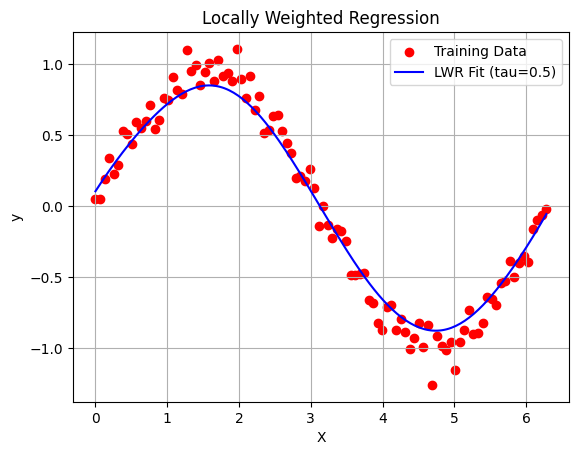

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Gaussian kernel
def gaussian_kernel(x, xi, tau):
    return np.exp(-np.sum((x - xi) ** 2) / (2 * tau ** 2))

# Locally weighted regression prediction
def lwr(x, X, y, tau):
    W = np.diag([gaussian_kernel(x, xi, tau) for xi in X])
    theta = np.linalg.inv(X.T @ W @ X) @ X.T @ W @ y
    return x @ theta

# Generate data
np.random.seed(42)
X = np.linspace(0, 2 * np.pi, 100)
y = np.sin(X) + 0.1 * np.random.randn(100)

# Add bias
X_bias = np.c_[np.ones(X.shape), X]
x_test = np.linspace(0, 2 * np.pi, 200)
x_test_bias = np.c_[np.ones(x_test.shape), x_test]

# Predictions
tau = 0.5
y_pred = np.array([lwr(xi, X_bias, y, tau) for xi in x_test_bias])

# Plot
plt.scatter(X, y, color='red', label='Training Data')
plt.plot(x_test, y_pred, color='blue', label=f'LWR Fit (tau={tau})')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Locally Weighted Regression')
plt.legend()
plt.grid(True)
plt.show()
